In [163]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from collections import Counter
from unidecode import unidecode
from tqdm.notebook import tqdm

In [110]:
df_PER_gender = pd.read_csv(r'../../literary_gender_trouble-main/results/df_PER_gender_dated.csv')

In [111]:
df_PER_gender.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [168]:
results = pd.read_csv(r'../../literary_gender_trouble-main/results/prediction_all_proba_doc2vec.csv', encoding='utf_8')

In [169]:
results.set_index(['index'], inplace=True)

In [170]:
def retrieve_list_date(df_PER_gender, list_PER):
    list_date = []
    #list_per = [unidecode(elem) for elem in list(df_PER_gender.character)]
    
    for per in tqdm(list_PER):

        if per in list(df_PER_gender.character):
            row = df_PER_gender.loc[(df_PER_gender['character']==per)]
            list_date.append(int(row['date'].values[0]))
        else:
            print(per)

    return list_date

In [171]:
list_date = retrieve_list_date(df_PER_gender, list(results.index))

  0%|          | 0/27586 [00:00<?, ?it/s]

In [172]:
results['date']=list_date

In [173]:
results

,proba male,proba female,prediction,date
index,,,,
Glady-Alberic_Male-et-femelle_<Georges-839>,0.784130,0.215870,Female,1876
Glady-Alberic_Male-et-femelle_<Georges-912>,0.683934,0.316066,Female,1876
Glady-Alberic_Male-et-femelle_<une maîtresse-1204>,0.919684,0.080316,Female,1876
Glady-Alberic_Male-et-femelle_<un tout petit bébé de quatre ans-503>,0.121041,0.878959,Male,1876
Glady-Alberic_Male-et-femelle_<Georges-417>,0.422406,0.577594,Male,1876
...,...,...,...,...
Boisgobey-Fortune-du_Le-crime-de-l-Opera_<M . Roger Darcy-5981>,0.188199,0.811801,Male,1878
Boisgobey-Fortune-du_Le-crime-de-l-Opera_<votre femme-425>,0.005504,0.994496,Male,1878
Boisgobey-Fortune-du_Le-crime-de-l-Opera_<du capitaine-4243>,0.368463,0.631537,Male,1878


In [181]:
sns.set_palette('bright')
sns.set_context("talk")
sns.set_style("darkgrid")

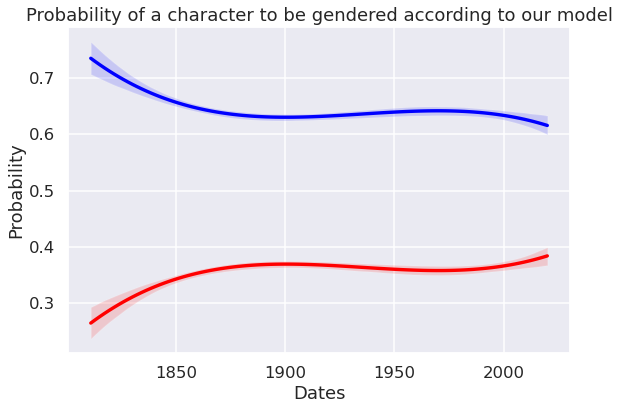

In [189]:
plt.figure(figsize=(9,6))
ax = plt.subplot()
ax.set_title('Probability of a character to be gendered according to our model')

#ax = sns.scatterplot(data=results, x='date', y='proba male', style="prediction")
ax = sns.regplot(data=results, x='date', y='proba male', color='red', order=3, scatter=False, ax=ax)
ax = sns.regplot(data=results, x='date', y='proba female', color='blue', order=3, scatter=False, ax=ax)

ax.set_xlabel('Dates')
ax.set_ylabel('Probability')

plt.show()

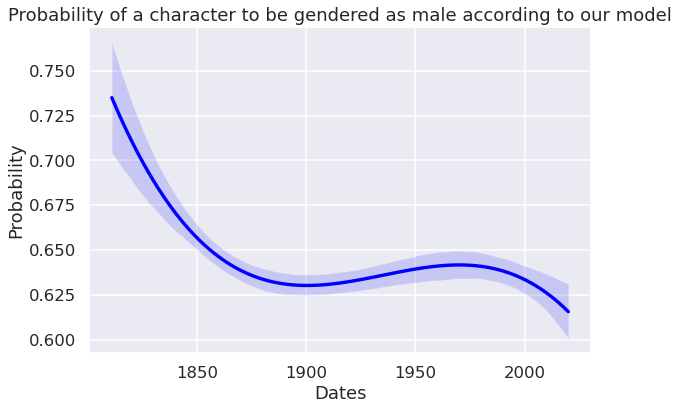

In [190]:
plt.figure(figsize=(9,6))
ax = plt.subplot()
ax.set_title('Probability of a character to be gendered as male according to our model')

#ax = sns.scatterplot(data=results, x='date', y='proba male', style="prediction")
#ax = sns.regplot(data=results, x='date', y='proba male', color='red', order=3, scatter=False, ax=ax)
ax = sns.regplot(data=results, x='date', y='proba female', color='blue', order=3, scatter=False, ax=ax)

ax.set_xlabel('Dates')
ax.set_ylabel('Probability')

plt.show()